<a href="https://colab.research.google.com/github/Kimforee/StartUp-Fund-Predictor/blob/main/Startup_Fund.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('startup_funding.csv')

In [ ]:
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)  #all in lower case

In [ ]:
print(df.isnull().sum())

Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical       0
SubVertical           936
City  Location        180
Investors Name          0
InvestmentnType         0
Amount in USD         960
Remarks              2625
dtype: int64


In [ ]:
df['Investors Name']=df['Investors Name'].fillna('UnDisclosed') #to remove null values

In [ ]:
df['Industry Vertical'].fillna(df['Industry Vertical'].mode()[0], inplace=True) #remove null value and replace with most occured industry vertical

In [ ]:
df['InvestmentnType'].fillna(df['InvestmentnType'].mode()[0], inplace=True)

In [ ]:
df['Amount in USD'] = pd.to_numeric(df['Amount in USD'].str.replace(',', ''), errors='coerce') #convert data type from object to numeric
df['Amount in USD'].fillna(df['Amount in USD'].mean(), inplace=True)  #remove null and replace with mean
# Define the percentile values
lower_limit = df['Amount in USD'].quantile(0.01)
upper_limit = df['Amount in USD'].quantile(0.99)

# Clip the values
df['Amount in USD'] = df['Amount in USD'].clip(lower=lower_limit, upper=upper_limit)  #remove outliers

In [ ]:
print(df.isnull().sum())

Startup Name         0
Industry Vertical    0
SubVertical          0
City  Location       0
Investors Name       0
InvestmentnType      0
Amount in USD        0
Date                 0
Day                  0
Month                0
Year                 0
Industry Category    0
dtype: int64


In [ ]:
# Display column names
print(df.columns)
print(df.dtypes)

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')
Sr No                  int64
Date dd/mm/yyyy       object
Startup Name          object
Industry Vertical     object
SubVertical           object
City  Location        object
Investors Name        object
InvestmentnType       object
Amount in USD        float64
Remarks               object
dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Sr No              3044 non-null   int64         
 1   Startup Name       3044 non-null   object        
 2   Industry Vertical  3044 non-null   object        
 3   SubVertical        2108 non-null   object        
 4   City  Location     2864 non-null   object        
 5   Investors Name     3044 non-null   object        
 6   InvestmentnType    3044 non-null   object        
 7   Amount in USD      3044 non-null   float64       
 8   Remarks            419 non-null    object        
 9   Date               3044 non-null   datetime64[ns]
 10  Day                3044 non-null   int64         
 11  Month              3044 non-null   int64         
 12  Year               3044 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(7)
memory us

In [ ]:
df.head()

,Sr No,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks,Date,Day,Month,Year
0,1,byju’s,e-tech,e-learning,bengaluru,tiger global management,private equity round,200000000.0,NaN,2020-01-09,9,1,2020
1,2,shuttl,transportation,app based shuttle service,gurgaon,susquehanna growth equity,series c,8048394.0,NaN,2020-01-13,13,1,2020
2,3,mamaearth,e-commerce,retailer of baby and toddler products,bengaluru,sequoia capital india,series b,18358860.0,NaN,2020-01-09,9,1,2020
3,4,https://www.wealthbucket.in/,fintech,online investment,new delhi,vinod khatumal,pre-series a,3000000.0,NaN,2020-01-02,2,1,2020
4,5,fashor,fashion and apparel,embroiled clothes for women,mumbai,sprout venture partners,seed round,1800000.0,NaN,2020-01-02,2,1,2020


In [ ]:
df['Date'] = pd.to_datetime(df['Date dd/mm/yyyy'], format='%d-%m-%Y')
# Extract month and year from the Date
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [ ]:
df3 = df.copy(deep=True)

In [ ]:
df.drop(['Date dd/mm/yyyy'],axis=1, inplace=True)

In [ ]:
df.drop(['Remarks','Sr No'],axis=1, inplace=True)

In [ ]:
df.drop(['Date'],axis=1, inplace=True)

In [ ]:
#replace in startup names
df['Startup Name'] = df['Startup Name'].str.lower()
df['Startup Name'] = df['Startup Name'].replace('"byju\\\'s"','byju’s')
df['Startup Name'] = df['Startup Name'].replace("'byju\\'s'","byju’s")
df['Startup Name'] = df['Startup Name'].replace('byju\\xe2\\x80\\x99s','byju’s')
df['Startup Name'] = df['Startup Name'].replace('byju\\xe2\\x80\\x99s','byju’s')
df['Startup Name'] = df['Startup Name'].replace('flipkart.com','flipkart')
df['Startup Name'] = df['Startup Name'].replace('oyo rooms','oyo')
df['Startup Name'] = df['Startup Name'].replace('oyo','oyo')
df['Startup Name'] = df['Startup Name'].replace('oyo rooms','oyo')
df['Startup Name'] = df['Startup Name'].replace('oyorooms','oyo')
df['Startup Name'] = df['Startup Name'].replace('oyorooms','oyo')
df['Startup Name'] = df['Startup Name'].replace('ola cabs','ola')
df['Startup Name'] = df['Startup Name'].replace('olacabs','ola')
df['Startup Name'] = df['Startup Name'].replace('https://www.wealthbucket.in/','wealthbucket')
df['Startup Name'] = df['Startup Name'].apply(lambda x: str(x).replace('\\\\xe2\\\\x80\\\\x99',''))
df['Startup Name'] = df['Startup Name'].apply(lambda x: str(x).replace('\\xc2\\xa0',''))
df['Startup Name'] = df['Startup Name'].apply(lambda x: str(x).replace('\\\\xc2\\\\xa0',''))
df.sort_values(by='Startup Name', inplace=True)

In [ ]:
#
df['SubVertical'] = df['SubVertical'].apply(lambda x: str(x).replace('\\xc2\\xa0',''))
df['SubVertical'] = df['SubVertical'].apply(lambda x: str(x).replace('\\\\xc2\\\\xa0',''))
df['SubVertical'] = df['SubVertical'].apply(lambda x: str(x).replace('nan','Unknown'))

In [ ]:
df['City  Location'] = df['City  Location'].str.lower()
df['City  Location'] = df['City  Location'].replace('delhi', 'new delhi')
df['City  Location'] = df['City  Location'].replace('bengaluru', 'bangalore')
df['City  Location'] = df['City  Location'].apply(lambda x: str(x).replace('bengaluru','bangalore'))
df['City  Location'] = df['City  Location'].apply(lambda x: str(x).replace('and','/'))
df['City  Location'] = df['City  Location'].apply(lambda x: str(x).replace(',','/'))
df['City  Location'] = df['City  Location'].replace('gurugram', 'gurgaon')
df['City  Location'] = df['City  Location'].replace('new york, bengaluru', 'bangalore')
df['City  Location'] = df['City  Location'].replace('delhi & cambridge', 'new delhi')
df['City  Location'] = df['City  Location'].replace('kolkatta', 'kolkata')
df['City  Location'] = df['City  Location'].replace('nan', 'other')
df['City  Location'] = df['City  Location'].replace('ahemadabad', 'ahemdabad')
df['City  Location'] = df['City  Location'].replace('bhubaneswar', 'bhubneswar')
df['City  Location'] = df['City  Location'].replace('nw delhi', 'new delhi')
df['City  Location'] = df['City  Location'].replace('\\\\xc2\\\\xa0noida', 'noida')
df['City  Location'] = df['City  Location'].replace('\\\\xc2\\\\xa0bangalore', 'bangalore')
df['City  Location'] = df['City  Location'].replace('\\\\xc2\\\\xa0gurgaon', 'gurgaon')
df['City  Location'] = df['City  Location'].replace('\\\\xc2\\\\xa0new delhi', 'new delhi')
df['City  Location'] = df['City  Location'].replace('\\\\xc2\\\\xa0mumbai', 'mumbai')
df['City  Location'] = df['City  Location'].apply(lambda x: str(x).replace('\\\\xc2\\\\xa0',''))

In [ ]:
unique_invest = df['City  Location'].unique()
print(unique_invest)

['other' 'kolkata' 'gurgaon' 'mumbai' 'kanpur' 'bangalore' 'new delhi'
 'hyderabad' 'goa/hyderabad' 'burnsville' 'udupi' 'chennai' 'jaipur'
 'pune' 'new delhi/ houston' 'singapore' 'noida' 'ch/igarh'
 'new york/ india' 'ahmedabad' 'missourie' 'coimbatore' 'bhubneswar'
 'pune / us' 'faridabad' 'california' 'india / us'
 'new delhi / california' 'usa/india' 'new york' 'new york/ bangalore'
 'chembur' 'vadodara' 'goa' 'mumbai / ny' 'indore' 'bangalore / san mateo'
 'san jose/' 'noida / singapore' 'chennai/ singapore' 'nagpur' 'varanasi'
 'sfo / bangalore' 'amritsar' 'lucknow' 'ahemdabad' 'india/us'
 'hyderabad/usa' 'mumbai / global' 'hubli' 'san francisco' 'us' 'tulangan'
 'triv/rum' 'menlo park' 'bangalore / sfo' 'gwalior' 'pune/seattle'
 'uttar pradesh' 'new delhi / us' 'india' '/heri' 'bangalore / usa'
 'bhopal' 'udaipur' 'srinagar' 'dallas / hyderabad' 'kochi'
 'mumbai/bangalore' 'pune / dubai' 'pune / singapore' 'mumbai / uk'
 'bangalore / gurugram' 'karur' 'haryana' 'kormangala' 'jo

In [ ]:
df['InvestmentnType'].replace({'private\\\\nequity': 'private equity round'}, inplace=True)
df['InvestmentnType'].replace({'seed/angel funding': 'seed / angel funding'}, inplace=True)
df['InvestmentnType'].replace({'seed / angle funding': 'seed / angel funding'}, inplace=True)
df['InvestmentnType'].replace({'angel / seed funding': 'seed / angel funding'}, inplace=True)
df['InvestmentnType'].replace({'seed/ angel funding': 'seed / angel funding'}, inplace=True)
df['InvestmentnType'].replace({'angel': 'angel funding'}, inplace=True)
df['InvestmentnType'].replace({'angel round': 'angel funding'}, inplace=True)
df['InvestmentnType'].replace({'seed': 'seed funding'}, inplace=True)
df['InvestmentnType'].replace({'seed round': 'seed funding'}, inplace=True)
df['InvestmentnType'].replace({'seed funding round': 'seed funding'}, inplace=True)
df['InvestmentnType'].replace({'seed funding round': 'seed funding'}, inplace=True)

investment_type_mapping = {
    'private equity': 'private equity funding',
    'private equity round': 'private equity funding',
    'private funding': 'private funding',
    'private equity funding': 'private equity funding',
    'equity funding': 'private equity funding',
    'privateequity': 'private equity funding',
    'equity funding': 'equity funding',
    'venture': 'venture round',
    'seed funding': 'seed funding',
    'debt funding': 'debt funding',
    'angel funding': 'angel funding',
    'series a': 'series a',
    'series b': 'series b',
    'series c': 'series c',
    'series d': 'series d',
    'series e': 'series e',
    'series f': 'series f',
    'series g': 'series g',
    'series h': 'series h',
    'series j': 'series j',
    'funding round': 'private funding',
    'corporate round': 'corporate round',
    'maiden round': 'maiden round',
    'single venture': 'single venture',
    'venture round': 'venture round',
    'venture - series unknown': 'venture round',
    'bridge round': 'bridge round',
    'debt and preference capital': 'debt and preference capital',
    'inhouse funding': 'inhouse funding',
    'seed / angel funding': 'seed / angel funding',
    'debt': 'debt funding',
    'pre series a': 'pre-series a',
    'equity': 'equity funding',
    'debt-funding': 'debt funding',
    'mezzanine': 'mezzanine',
    'series b (extension)': 'series b',
    'equity based funding': 'equity funding',
    'private funding': 'private funding',
    'private': 'private funding',
    'structured debt': 'debt funding',
    'term loan': 'term loan',
    'seed\\\\nfunding': 'seed funding',
    'crowd funding': 'crowd funding',
}

# Replace similar terms with a standardized category
df['InvestmentnType'].replace(investment_type_mapping, inplace=True)


In [ ]:
unique_invest = df['InvestmentnType'].unique()
print(unique_invest)

['private equity funding' 'seed funding' 'seed / angel funding'
 'pre-series a' 'series a' 'equity funding' 'debt funding'
 'single venture' 'series c' 'series b' 'term loan' 'private funding'
 'series d' 'angel funding' 'venture round' 'inhouse funding' 'mezzanine'
 'series e' 'maiden round' 'series h' 'series f' 'series g'
 'crowd funding' 'series j' 'corporate round' 'bridge round'
 'debt and preference capital']


In [ ]:
df['Industry Vertical'] = df['Industry Vertical'].apply(lambda x: str(x).replace('\\xc2\\xa0',''))
df['Industry Vertical'] = df['Industry Vertical'].apply(lambda x: str(x).replace('\\\\xc2\\\\xa0',''))
df['Industry Vertical'] = df['Industry Vertical'].apply(lambda x: str(x).replace('\\xe2\\x80\\x93',''))
df['Industry Vertical'] = df['Industry Vertical'].apply(lambda x: str(x).replace('\\\\n',''))
df['Industry Vertical'] = df['Industry Vertical'].apply(lambda x: str(x).replace('\\\\xc3\\\\xa9\\\\xe2\\\\x80\\\\x99s','e'))
df['Industry Vertical'] = df['Industry Vertical'].apply(lambda x: str(x).replace('\\\\xc3\\\\xa9','e'))
df['Industry Vertical'] = df['Industry Vertical'].apply(lambda x: str(x).replace('\\\\xe2\\\\x80\\\\x99','e'))
df['Industry Vertical'] = df['Industry Vertical'].apply(lambda x: str(x).replace('\\\\xe2\\\\x80\\\\x99','e'))
df['Industry Vertical'].fillna(value='Other', inplace=True)

In [ ]:
unique_indusverticals = df['Industry Vertical'].unique()
print(unique_indusverticals)

In [ ]:
# Mapping from Industry Vertical to Industry Category
industry_mapping = {
    'technology': 'Technology',
    'e-tech':'Technology',
    'transportation': 'Transportation',
    'e-commerce': 'E-Commerce',
    '': 'Other',
    'nan': 'Other',
    'finance technology': 'Finance Technology',
    'fashion': 'Fashion',
    'logistics': 'Logistics and Services',
    'hospitality': 'Hospitality',
    'aerospace': 'Aerospace',
    'foodtech': 'Food and Beverage',
    'finance': 'Finance Technology',
    'video': 'Media and Entertainment',
    'gaming': 'Media and Entertainment',
    'software': 'Technology Solutions',
    'healthcare': 'Healthcare',
    'education': 'Education',
    'food and beverage': 'Food and Beverage',
    'b2b marketing': 'Marketing and Advertising',
    'video games': 'Media and Entertainment',
    'saas': 'Technology Solutions',
    'last mile transportation': 'Transportation',
    'customer service': 'Others',
    'b2b': 'Others',
    'consumer products': 'Others',
    'marketing': 'Marketing and Advertising',
    'internet of things': 'Technology',
    'accounting': 'Finance Technology',
    'retail': 'E-Commerce',
    'customer service platform': 'Others',
    'automotive': 'Technology',
    'education technology': 'Education',
    'services': 'Logistics and Services',
    'compliance': 'Finance Technology',
    'transport': 'Transportation',
    'artificial intelligence': 'Technology',
    'health care': 'Healthcare',
    'luxury label': 'Fashion and Apparel',
    'waste management service': 'Logistics and Services',
    'deep-tech': 'Technology',
    'agriculture': 'Others',
    'energy': 'Energy and Clean Technology',
    'digital media': 'Media and Entertainment',
    'automobile': 'Transportation',
    'agtech': 'Others',
    'social media': 'Media and Entertainment',
    'ai': 'Technology',
    'ecommerce': 'E-Commerce',
    'services platform': 'Logistics and Services',
    'travel tech': 'Technology',
    'online education': 'Education',
    'online marketplace': 'E-Commerce',
    'saas, ecommerce': 'Technology Solutions',
    'nbfc': 'Finance',
    'food': 'Food and Beverage',
    'food tech': 'Food and Beverage',
    'automation': 'Technology',
    'investment': 'Finance',
    'social network': 'Media and Entertainment',
    'financial tech': 'Finance',
    'real estate': 'Real Estate and Property',
    'logistics tech': 'Logistics and Services',
    'consumer internet': 'Technology',
    'b2b platform': 'Others',
    'fin-tech': 'Finance',
    'food-tech': 'Food and Beverage',
    'ed-tech': 'Education',
    'it': 'Technology',
    'clean technology': 'Energy and Clean Technology',
    'fiinance': 'Finance',
    'food and beverages': 'Food and Beverage',
    'entertainment': 'Media and Entertainment',
    'inspiration': 'Others',
    'storytelling': 'Others',
    'others': 'Others',
    'food & beverage': 'Food and Beverage',
    'consumer portal': 'Technology',
    'fmcg': 'Others',
    'reality': 'Others',
    'consumer interne': 'Technology',
    'online education information platform': 'Education',
    'brand licensing startup': 'Others',
    'gourmet food discovery & delivery platform': 'Food and Beverage',
    'transportation & logistics platform': 'Logistics and Services',
    'enterprise marketing automation platform': 'Marketing and Advertising',
    'health, wellness & beauty services app': 'Healthcare',
    'digital healthcare': 'Healthcare',
    'last minute hotel booking app': 'Hospitality',
    'womens fashion wear portal': 'Fashion',
    'product learning platform': 'Education',
    'online food ordering & delivery platform': 'Food and Beverage',
    'app based bus pooling services': 'Transportation',
    'social learning platform': 'Education',
    'social fitness platform': 'Healthcare',
    'on demand mobile app developer': 'Technology',
    'car maintenance & management mobile app': 'Transportation',
    'online wedding marketplace': 'E-Commerce',
    'splitting bills mobile app': 'Finance',
    'iot energy management analytics platform': 'Energy',
    'custom made furniture e-tailer': 'E-Commerce',
    'qsr chain': 'Hospitality',
    'elearning platform': 'Education',
    'smart safety wearable devices': 'Healthcare',
    'cab sharing service mobile app': 'Transportation',
    'cloud enterprise mobility platform': 'Technology',
    'online shopping assistant mobile app': 'E-Commerce',
    'home cooked food order & delivery platform': 'Food and Beverage',
    'online school for analytics learning': 'Education',
    'chat based personal assistant app': 'Technology',
    'picture creation & social mobile app': 'Media and Entertainment',
    'nonbanking finance company': 'Finance',
    'ecommerce returns etailer': 'E-Commerce',
    'online freight services aggregator': 'Logistics and Services',
    'online branded furniture etailer': 'E-Commerce',
    'digital analytics platform': 'Technology',
    'internet network infrastructure services': 'Technology',
    'supply chain & logistics solutions': 'Logistics and Services',
    'holiday resort chain': 'Hospitality',
    'mobile point of sale solutions': 'Technology',
    'peer-to-peer money transfer & recharge app': 'Finance',
    'test automation saas platform': 'Technology Solutions',
    'citizens engagement platform': 'Others',
    'indoor navigation & analytics solutions': 'Technology',
    'hyperlocal on-demand household services platform': 'Logistics and Services',
    'online rti application services': 'Others',
    'ecommerce website creation saas platform': 'Technology Solutions',
    'wedding venues & vendors marketplace': 'Hospitality',
    'interface development platform for government officials': 'Others',
    'modular furnishings marketplace': 'Real Estate and Property',
    'private jet bookings marketplace': 'Hospitality',
    'cab search comparison & booking platform': 'Transportation',
    'performance optimization platform for athletes': 'Healthcare',
    'event venue booking platform': 'Hospitality',
    'digital media platform': 'Media and Entertainment',
    'visual search and discovery platform': 'Technology',
    'home services marketplace': 'Logistics and Services',
    'end to end reverse logistics solution platform': 'Logistics and Services',
    'virtual health consultation app': 'Healthcare',
    'online renting platform': 'Real Estate and Property',
    'logistics services provider': 'Logistics and Services',
    'data science & ux design learning platform': 'Education',
    'structured lending marketplace': 'Finance',
    'electric bike manufacturers': 'Transportation',
    'ecommerce platform solutions': 'E-Commerce',
    'online media publication': 'Media and Entertainment',
    'international hiring platform': 'Others',
    'logistics service provider marketplace': 'Logistics and Services',
    'hyperlocal grocery delivery service': 'Food and Beverage',
    'sports education platform': 'Education',
    'bike, appliances renting marketplace': 'Logistics and Services',
    'online marketplace for industrial goods': 'E-Commerce',
    'reward points mobile app': 'Technology',
    'mobile accessories online store': 'E-Commerce',
    'content discovery & reward points platform': 'Technology',
    'artificial intelligence platform': 'Technology',
    'medical consultation & doctor appointment booking platform': 'Healthcare',
    'mobile fitness app': 'Healthcare',
    'digital coupons, deal & cashback aggregator app': 'Finance',
    'mobile game development & design platform': 'Media and Entertainment',
    'b2b ecommerce marketplace': 'E-Commerce',
    'furniture and appliances rental platform': 'E-Commerce',
    'b2b merchandize platform': 'E-Commerce',
    'real estate focused tech platform': 'Real Estate and Property',
    'photographer online search & booking platform': 'Media and Entertainment',
    'grocery delivery platform': 'Food and Beverage',
    'mobile car servicing appointment app': 'Transportation',
    'new curation mobile app': 'Media and Entertainment',
    'mobile wallet': 'Finance',
    'bus aggregation and rental mobile app': 'Transportation',
    'hyperlocal online services platform': 'Logistics and Services',
    'wifi first cloud communication platform': 'Technology',
    'alternate mobile monetization platform': 'Technology',
    'online food ordering marketplace': 'Food and Beverage',
    'quick service restaurant & online delivery': 'Food and Beverage',
    'online loans marketplace': 'Finance',
    'budget hotels aggregator': 'Hospitality',
    'efficient energy management platform': 'Energy and Clean Technology',
    'digital intelligent learning platform': 'Education',
    'voice call incentivization mobile app': 'Technology',
    'online counselling and psychological support platform': 'Healthcare',
    'domestic help aggregation platform': 'Logistics and Services',
    'home stay & room rentals platform': 'Hospitality',
    'selfie mobile app': 'Media and Entertainment',
    'online reputation management platform': 'Technology',
    'online grocery platform': 'Food and Beverage',
    'online content platform for women': 'Media and Entertainment',
    'online vehicle spare parts etailer': 'E-Commerce',
    'event ticketing platform': 'Media and Entertainment',
    'affordable personal healthcare products': 'Healthcare',
    'premium dining lounges & restaurants': 'Hospitality',
    'mobile growth hacking platform': 'Technology',
    'skill training startup': 'Education',
    'beauty and wellness marketplace': 'Healthcare',
    'marketplace app for bangkok': 'Others',
    'on-demand maids service provider': 'Logistics and Services',
    'ecommerce product search engine': 'E-Commerce',
    'ready to cook packaged foods': 'Food and Beverage',
    'product customization platform': 'E-Commerce',
    'branded food products online sales': 'Food and Beverage',
    'talent platform for fashion professionals': 'Fashion and Apparel',
    'auto insurance online platform': 'Finance',
    'hyperlocal logistics service provider': 'Logistics and Services',
    'cricket management mobile game': 'Media and Entertainment',
    'on demand laundry service platform': 'Logistics and Services',
    'ecommerce discount & cashback coupons platform': 'Finance',
    'virtual reality headset creator': 'Technology',
    'others':'Others'
}

# Replace Industry Vertical with corresponding Industry Category and store in a new column
df['Industry Category'] = df['Industry Vertical'].str.lower().map(industry_mapping)


In [ ]:
df['Industry Category'].fillna(df['Industry Category'].mode()[0], inplace=True)

In [ ]:
df.head()

,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Date,Day,Month,Year,Industry Category
2992,#fame,113,3,70,to the new ventures,11,1.000000e+07,2015-01-05,5,1,2015,17
1242,121policy,113,1235,47,xelpmoc,14,1.842990e+07,2016-11-25,25,11,2016,17
201,19th mile,368,94,28,"rishi vasudev, excelsior investments, ritesh v...",13,1.800000e+05,2018-07-12,12,7,2018,17
1007,1crowd,241,1716,54,ganesh natarajan,14,1.842990e+07,2017-02-09,9,2,2017,8
311,1mg,113,1336,28,"sequoia capital, maverick capital ltd and hbm ...",11,1.000000e+07,2018-04-27,27,4,2018,17


In [ ]:
label_encoder = LabelEncoder()
df['Industry Category'] = label_encoder.fit_transform(df['Industry Category'])

In [ ]:
unique_indusverticals = df['Industry Category'].unique()
print(unique_indusverticals)

[17  8  1 10 18 12  6  9  7 15 19  2 16  4 14 11  0  5 13  3]


In [ ]:
# one hot encoding
# df = pd.get_dummies(df, columns=['Industry Category'], prefix='industry')

In [ ]:
df['SubVertical'].fillna(df['SubVertical'].mode()[0], inplace=True)
unique_subverticals = df['SubVertical'].unique()
print(unique_subverticals)

['Unknown' 'online insurance platform'
 'artificial intelligence-based sales acceleration software platform' ...
 'self-driven cab booking platform' 'car driver discovery app'
 'online recruitment platform']


In [ ]:

# Handle missing values if any

# Encode categorical variables using Label Encoding
label_encoder = LabelEncoder()
df['Industry Vertical'] = label_encoder.fit_transform(df['Industry Vertical'])
df['SubVertical'] = label_encoder.fit_transform(df['SubVertical'])
df.rename(columns={'City  Location': 'City Location'}, inplace=True)
df['City Location'] = label_encoder.fit_transform(df['City Location'])
df['InvestmentnType'] = label_encoder.fit_transform(df['InvestmentnType'])

In [ ]:

# Example: Total funding received by each startup till the current round
df['Total Funding'] = df.groupby('Startup Name')['Amount in USD'].cumsum()

In [ ]:
df.head(2)

,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Date,Day,Month,Year,Industry Category,Total Funding
2992,#fame,113,3,70,to the new ventures,11,1.000000e+07,2015-01-05,5,1,2015,17,1.000000e+07
1242,121policy,113,1235,47,xelpmoc,14,1.842990e+07,2016-11-25,25,11,2016,17,1.842990e+07


In [ ]:
# Drop unnecessary columns
df.drop(['Startup Name', 'Investors Name'], axis=1, inplace=True)

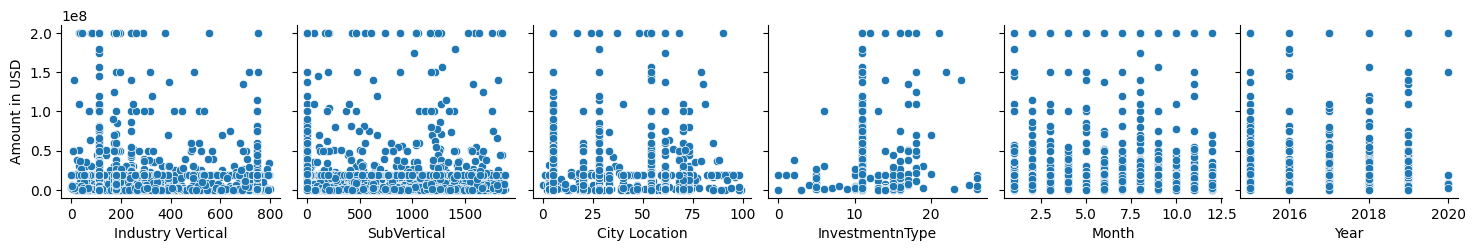

In [ ]:

# Explore the relationship between features and target variable
sns.pairplot(df, x_vars=['Industry Vertical', 'SubVertical', 'City Location', 'InvestmentnType', 'Month', 'Year'],
             y_vars='Amount in USD', kind='scatter')
plt.show()


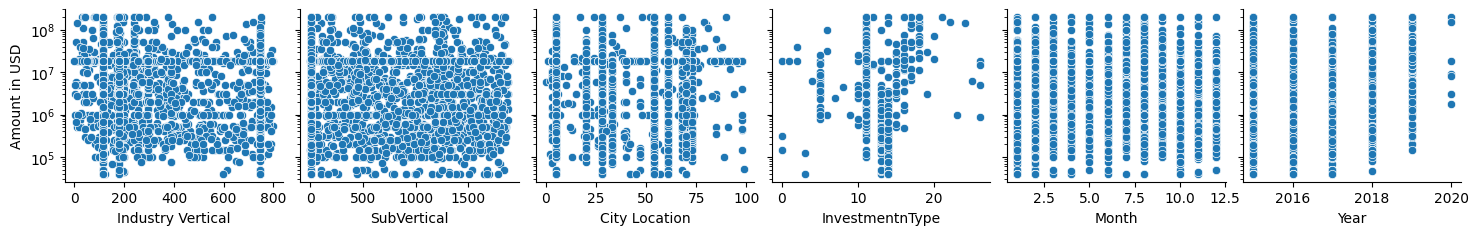

In [ ]:
# # Use a log scale for the y-axis
# sns.pairplot(df, x_vars=['Industry Vertical', 'SubVertical', 'City Location', 'InvestmentnType', 'Month', 'Year'],
#              y_vars='Amount in USD', kind='scatter')
# plt.yscale('log')  # Add this line to use a log scale for the y-axis
# plt.show()


In [ ]:
print(df.isnull().sum())


Startup Name         0
Industry Vertical    0
SubVertical          0
City Location        0
Investors Name       0
InvestmentnType      0
Amount in USD        0
Date                 0
Day                  0
Month                0
Year                 0
Industry Category    0
Total Funding        0
dtype: int64


In [ ]:
print(df.dtypes)

Industry Vertical      int64
SubVertical            int64
City Location          int64
InvestmentnType        int64
Amount in USD        float64
Day                    int64
Month                  int64
Year                   int64
Industry Category      int64
Total Funding        float64
dtype: object


In [ ]:
# print(df.iloc[:, :15].dtypes)

In [ ]:
df['Amount in USD'] = df['Amount in USD'].round(0)
df['Total Funding'] = df['Total Funding'].round(0) #round of large numbers

In [ ]:
df5=df.copy(deep=True)

In [ ]:
df4=df.copy(deep=True)

In [ ]:
df5.drop(['Day'], axis=1, inplace=True)
df5.drop(['Year'], axis=1, inplace=True)
df5.drop(['Month'], axis=1, inplace=True)
df5.drop(['SubVertical'], axis=1, inplace=True)
df5.drop(['City Location'], axis=1, inplace=True)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# model training
# Split the dataset into training and testing sets
X = df5.drop('Amount in USD', axis=1)
y = df5['Amount in USD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Regressor
model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 238991018684239.25
R-squared: 0.6245265013247561


Mean Squared Error: 260576405395450.38


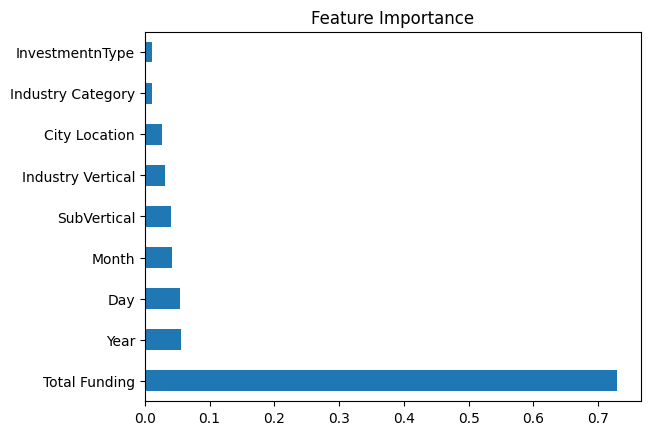

In [ ]:
X = df4.drop('Amount in USD', axis=1)
y = df4['Amount in USD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Example: Evaluate the model
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Feature Importance Plot
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')
plt.show()